In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%store -r econ_x

In [4]:
%store -r econ_x_raw

In [5]:
econ_x_raw.head(4).T

,1999-01-31 00:00:00,1999-02-28 00:00:00,1999-03-31 00:00:00,1999-04-30 00:00:00
GDP,0.011633,0.011633,0.011633,0.016247
DGS10,0.135193,-0.007561,0.020952,0.052239
CSUSHPINSA,0.002803,0.006773,0.008864,0.009844
PAYEMS,0.003202,0.000843,0.002916,0.001648
TEDRATE,-0.200000,0.312500,-0.111111,-0.035714
FEDFUNDS,0.046300,0.047600,0.048100,0.047400
NETEXP,0.177028,0.177028,0.177028,0.124998
PCE,0.004771,0.005140,0.010374,0.004788
UNRATE,0.043000,0.044000,0.042000,0.043000
UMCSENT,0.040423,-0.022202,-0.010407,0.021033


In [6]:
def return_function(df):
    if type(df)!=pd.DataFrame:
        df = pd.DataFrame(df)
    out_df = (df.shift(-1)-df)/df
    return out_df

In [7]:
tech_data = pd.read_csv("tech_raw_data_ret.csv")
tech_data.index = pd.DatetimeIndex(tech_data.iloc[:,[0]].values.flatten())
tech_data = tech_data.iloc[:,1:]

In [8]:
tech_data.head()

,benchmark,GDP,CSUSHPINSA,DGS10,TEDRATE,FEDFUNDS,PCE,UNRATE,RECPROUSM156N,VIXCLS,...,YIELD_SLOPE,XAU.Curncy,CSENT,PAYEMS,OAS,SP500,TELECOMEXPORT,PPI_TELECOM,PPI_SOFTWARE,PPI_Semiconductor
2000-10-31,-0.080775,0.011088,0.005507,0.0577,0.0057,0.0651,0.000940,0.039,0.0268,0.148760,...,-0.00163,-0.033181,0.017013,0.001723,0.0809,-0.004949,0.031823,-0.019293,0.000964,-0.003367
2000-11-30,-0.234329,0.011088,0.005198,0.0548,0.0068,0.0651,0.002153,0.039,0.0440,0.254761,...,-0.00145,0.019989,-0.085502,0.001071,0.0901,-0.080069,0.000000,-0.018579,-0.015414,-0.002252
2000-12-31,-0.087223,0.011088,0.004617,0.0512,0.0067,0.0640,0.006432,0.039,0.0806,-0.094435,...,0.00016,0.006656,-0.037602,-0.000188,0.0846,0.004053,0.009346,0.002227,-0.001957,-0.007901
2001-01-31,0.172171,0.003422,0.003953,0.0519,0.0056,0.0598,0.004399,0.042,0.1576,-0.179888,...,0.00542,-0.023508,-0.043295,0.000543,0.0761,0.034637,0.009259,-0.038889,0.005882,0.000000
2001-02-28,-0.290618,0.003422,0.003845,0.0492,0.0032,0.0549,0.002782,0.042,0.1868,0.287466,...,0.00506,0.004890,0.009934,-0.000203,0.0792,-0.092291,-0.002752,0.042775,-0.006823,-0.004551


In [9]:
common_data_column = list(set(list(tech_data.columns)).intersection(set(list(econ_x_raw.columns))))
common_data_column

['GDP',
 'DGS10',
 'TEDRATE',
 u'YIELD_SLOPE',
 'PAYEMS',
 'VIXCLS',
 'CSUSHPINSA',
 'RECPROUSM156N',
 'UNRATE',
 'FEDFUNDS',
 'PCE']

In [10]:
fin_specific_columns = np.setdiff1d(list(econ_x_raw.columns),common_data_column)

In [11]:
common_data = tech_data.loc[:,common_data_column]

In [12]:
fin_specific = econ_x_raw.loc[:,fin_specific_columns]
fin_specific.head()

,BAMLH0A0HYM2,NETEXP,UMCSENT,XAU Curncy,XOI Index
1999-01-31,0.0560,0.177028,0.040423,0.003145,-0.025344
1999-02-28,0.0521,0.177028,-0.022202,-0.024386,0.170485
1999-03-31,0.0519,0.177028,-0.010407,0.023210,0.143123
1999-04-30,0.0476,0.124998,0.021033,-0.056535,-0.018813
1999-05-31,0.0475,0.124998,0.004682,-0.029036,0.005817


In [13]:
fin_specific.iloc[:,[0]] = fin_specific.iloc[:,[0]]/100
fin_specific.iloc[:,[1]] = quaterly_to_monthly(return_function(fin_specific.iloc[::3,[1]]).resample("M").last())
# fin_specific.iloc[:,[2]] = return_function(fin_specific.iloc[:,[2]])
# fin_specific.iloc[:,[3]] = return_function(fin_specific.iloc[:,[3]])
# fin_specific.iloc[:,[4]] = return_function(fin_specific.iloc[:,[4]])

In [14]:
# plt.plot(fin_specific.iloc[:,[3]])
# plt.show()
merged_fin_partial = pd.concat([common_data,fin_specific],1).dropna()

In [15]:
fin_raw_data = pd.read_csv("financial_sctor_raw.csv")
fin_raw_data.index = pd.DatetimeIndex(fin_raw_data.iloc[:,[0]].values.flatten())
fin_raw_data = fin_raw_data.iloc[:,1:]

fin_raw_data = fin_raw_data.iloc[:,1:]
fin_raw_data.head()

,GDP,DGS10,CSUSHPINSA,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,UMCSENT,...,YIELD_SLOPE,XAU Curncy,LUMSTRUU Index,DXY Curncy,M2 Index,LUGCTRUU Index,TAIEALLGCLCRT100EP,CCSA,JTU5200JOR,ACILOB
2000-12-31,10472.285,5.12,108.79,132731.0,0.67,0.0640,-402.351,6979.1,0.039,98.4,...,0.016,272.25,974.99,109.56,4905.0,1052.19,193394.0,2306400.0,3.4,209095.0
2001-01-31,10508.121,5.19,109.22,132706.0,0.56,0.0598,-391.688,7009.8,0.042,94.7,...,0.542,265.85,990.17,110.52,4955.3,1069.84,165824.0,2395750.0,5.0,224063.0
2001-02-28,10508.121,4.92,109.64,132778.0,0.32,0.0549,-391.688,7029.3,0.042,90.6,...,0.506,267.15,995.84,112.01,4993.0,1080.88,165824.0,2486500.0,3.9,224063.0
2001-03-31,10508.121,4.93,110.40,132751.0,0.68,0.0531,-391.688,7022.1,0.043,91.5,...,0.737,257.95,1001.62,117.37,5050.3,1085.84,165824.0,2585400.0,3.5,224063.0
2001-04-30,10638.384,5.35,111.25,132471.0,0.48,0.0480,-359.331,7036.2,0.044,88.4,...,1.062,264.05,1003.01,115.76,5113.7,1077.70,170433.0,2697250.0,3.8,221305.0


In [16]:
fin_sector = pd.read_excel('/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/benchmark_data.xlsx',9)
fin_sector.index = pd.DatetimeIndex(fin_sector.iloc[:,[0]].values.flatten())
fin_sector = fin_sector.iloc[:,[1]]

sector_indicator = fin_sector

In [17]:
additional_fin_columns = np.setdiff1d(list(fin_raw_data.columns),merged_fin_partial.columns)
additional_fin_data = fin_raw_data.loc[:,additional_fin_columns]
additional_fin_data.head()

,ACILOB,CCSA,DXY Curncy,JTU5200JOR,LUGCTRUU Index,LUMSTRUU Index,M2 Index,TAIEALLGCLCRT100EP
2000-12-31,209095.0,2306400.0,109.56,3.4,1052.19,974.99,4905.0,193394.0
2001-01-31,224063.0,2395750.0,110.52,5.0,1069.84,990.17,4955.3,165824.0
2001-02-28,224063.0,2486500.0,112.01,3.9,1080.88,995.84,4993.0,165824.0
2001-03-31,224063.0,2585400.0,117.37,3.5,1085.84,1001.62,5050.3,165824.0
2001-04-30,221305.0,2697250.0,115.76,3.8,1077.70,1003.01,5113.7,170433.0


In [18]:
additional_fin_data.iloc[:,[0]] = quaterly_to_monthly(return_function(additional_fin_data.iloc[::3,[0]]).resample("M").last())
additional_fin_data.iloc[:,[1]] = return_function(additional_fin_data.iloc[:,[1]])
additional_fin_data.iloc[:,[2]] =  return_function(additional_fin_data.iloc[:,[2]])
additional_fin_data.iloc[:,[3]] = additional_fin_data.iloc[:,[3]]/100
additional_fin_data.iloc[:,[4]] = return_function(additional_fin_data.iloc[:,[4]])
additional_fin_data.iloc[:,[5]] = return_function(additional_fin_data.iloc[:,[5]])
additional_fin_data.iloc[:,[6]] = return_function(additional_fin_data.iloc[:,[6]])
additional_fin_data.iloc[:,[7]] = return_function(additional_fin_data.iloc[:,[7]])

In [19]:
additional_fin_data.head()

,ACILOB,CCSA,DXY Curncy,JTU5200JOR,LUGCTRUU Index,LUMSTRUU Index,M2 Index,TAIEALLGCLCRT100EP
2000-12-31,0.071585,0.038740,0.008762,0.034,0.016775,0.015569,0.010255,-0.142559
2001-01-31,0.071585,0.037880,0.013482,0.050,0.010319,0.005726,0.007608,0.000000
2001-02-28,0.071585,0.039775,0.047853,0.039,0.004589,0.005804,0.011476,0.000000
2001-03-31,-0.012309,0.043262,-0.013717,0.035,-0.007497,0.001388,0.012554,0.027795
2001-04-30,-0.012309,0.045231,0.028594,0.038,0.005753,0.006630,-0.000548,0.000000


In [20]:
pd.concat([merged_fin_partial,additional_fin_data],1)

,GDP,DGS10,TEDRATE,YIELD_SLOPE,PAYEMS,VIXCLS,CSUSHPINSA,RECPROUSM156N,UNRATE,FEDFUNDS,...,XAU Curncy,XOI Index,ACILOB,CCSA,DXY Curncy,JTU5200JOR,LUGCTRUU Index,LUMSTRUU Index,M2 Index,TAIEALLGCLCRT100EP
2000-10-31,0.011088,0.0577,0.0057,-0.001630,0.001723,0.148760,0.005507,0.0268,0.039,0.0651,...,0.019989,-0.026538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-30,0.011088,0.0548,0.0068,-0.001450,0.001071,0.254761,0.005198,0.0440,0.039,0.0651,...,0.006656,0.061671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-12-31,0.011088,0.0512,0.0067,0.000160,-0.000188,-0.094435,0.004617,0.0806,0.039,0.0640,...,-0.023508,-0.015422,0.071585,0.038740,0.008762,0.034,0.016775,0.015569,0.010255,-0.142559
2001-01-31,0.003422,0.0519,0.0056,0.005420,0.000543,-0.179888,0.003953,0.1576,0.042,0.0598,...,0.004890,-0.004905,0.071585,0.037880,0.013482,0.050,0.010319,0.005726,0.007608,0.000000
2001-02-28,0.003422,0.0492,0.0032,0.005060,-0.000203,0.287466,0.003845,0.1868,0.042,0.0549,...,-0.034438,0.007709,0.071585,0.039775,0.047853,0.039,0.004589,0.005804,0.011476,0.000000
2001-03-31,0.003422,0.0493,0.0068,0.007370,-0.002109,0.010229,0.006932,0.2268,0.043,0.0531,...,0.023648,0.104563,-0.012309,0.043262,-0.013717,0.035,-0.007497,0.001388,0.012554,0.027795
2001-04-30,0.012396,0.0535,0.0048,0.010620,-0.000294,-0.110335,0.007699,0.2638,0.044,0.0480,...,0.006817,0.002326,-0.012309,0.045231,0.028594,0.038,0.005753,0.006630,-0.000548,0.000000
2001-05-31,0.012396,0.0543,0.0044,0.011930,-0.000982,-0.111460,0.008539,0.2700,0.043,0.0421,...,0.018808,-0.063652,-0.012309,0.045455,0.003359,0.036,0.004797,0.002139,0.007866,0.000000
2001-06-30,0.012396,0.0542,0.0027,0.011700,-0.000839,-0.158127,0.009537,0.2748,0.045,0.0397,...,-0.015507,-0.001039,-0.031522,0.028279,-0.019168,0.041,0.024920,0.017750,0.005805,-0.068772
2001-07-31,0.000104,0.0507,0.0021,0.012570,-0.001180,0.134313,0.008475,0.2598,0.046,0.0377,...,0.029064,0.001040,-0.031522,0.029448,-0.032087,0.039,0.012838,0.008827,0.006524,0.000000


In [21]:
fin_x_clean_return = pd.concat([merged_fin_partial,additional_fin_data],1).dropna()
fin_x_clean_return.head()

,GDP,DGS10,TEDRATE,YIELD_SLOPE,PAYEMS,VIXCLS,CSUSHPINSA,RECPROUSM156N,UNRATE,FEDFUNDS,...,XAU Curncy,XOI Index,ACILOB,CCSA,DXY Curncy,JTU5200JOR,LUGCTRUU Index,LUMSTRUU Index,M2 Index,TAIEALLGCLCRT100EP
2000-12-31,0.011088,0.0512,0.0067,0.00016,-0.000188,-0.094435,0.004617,0.0806,0.039,0.0640,...,-0.023508,-0.015422,0.071585,0.038740,0.008762,0.034,0.016775,0.015569,0.010255,-0.142559
2001-01-31,0.003422,0.0519,0.0056,0.00542,0.000543,-0.179888,0.003953,0.1576,0.042,0.0598,...,0.004890,-0.004905,0.071585,0.037880,0.013482,0.050,0.010319,0.005726,0.007608,0.000000
2001-02-28,0.003422,0.0492,0.0032,0.00506,-0.000203,0.287466,0.003845,0.1868,0.042,0.0549,...,-0.034438,0.007709,0.071585,0.039775,0.047853,0.039,0.004589,0.005804,0.011476,0.000000
2001-03-31,0.003422,0.0493,0.0068,0.00737,-0.002109,0.010229,0.006932,0.2268,0.043,0.0531,...,0.023648,0.104563,-0.012309,0.043262,-0.013717,0.035,-0.007497,0.001388,0.012554,0.027795
2001-04-30,0.012396,0.0535,0.0048,0.01062,-0.000294,-0.110335,0.007699,0.2638,0.044,0.0480,...,0.006817,0.002326,-0.012309,0.045231,0.028594,0.038,0.005753,0.006630,-0.000548,0.000000


In [22]:
sector_return = return_function(sector_indicator)

In [23]:
sector_return,merged_fin_partial = model_data(sector_return,merged_fin_partial)
pd.concat([sector_return,merged_fin_partial],1).to_csv("fin_clean_only_econ.csv")

In [24]:
sector_return,fin_x_clean_return = model_data(sector_return,fin_x_clean_return)
fin_clean_merged_data = pd.concat([sector_return,fin_x_clean_return],1)

In [25]:
fin_clean_merged_data

,IYF US Equity,GDP,DGS10,TEDRATE,YIELD_SLOPE,PAYEMS,VIXCLS,CSUSHPINSA,RECPROUSM156N,UNRATE,...,XAU Curncy,XOI Index,ACILOB,CCSA,DXY Curncy,JTU5200JOR,LUGCTRUU Index,LUMSTRUU Index,M2 Index,TAIEALLGCLCRT100EP
2000-12-31,-0.005747,0.011088,0.0512,0.0067,0.000160,-0.000188,-0.094435,0.004617,0.0806,0.039,...,-0.023508,-0.015422,0.071585,0.038740,0.008762,0.034,0.016775,0.015569,0.010255,-0.142559
2001-01-31,-0.063006,0.003422,0.0519,0.0056,0.005420,0.000543,-0.179888,0.003953,0.1576,0.042,...,0.004890,-0.004905,0.071585,0.037880,0.013482,0.050,0.010319,0.005726,0.007608,0.000000
2001-02-28,-0.025293,0.003422,0.0492,0.0032,0.005060,-0.000203,0.287466,0.003845,0.1868,0.042,...,-0.034438,0.007709,0.071585,0.039775,0.047853,0.039,0.004589,0.005804,0.011476,0.000000
2001-03-31,0.038608,0.003422,0.0493,0.0068,0.007370,-0.002109,0.010229,0.006932,0.2268,0.043,...,0.023648,0.104563,-0.012309,0.043262,-0.013717,0.035,-0.007497,0.001388,0.012554,0.027795
2001-04-30,0.037172,0.012396,0.0535,0.0048,0.010620,-0.000294,-0.110335,0.007699,0.2638,0.044,...,0.006817,0.002326,-0.012309,0.045231,0.028594,0.038,0.005753,0.006630,-0.000548,0.000000
2001-05-31,-0.000705,0.012396,0.0543,0.0044,0.011930,-0.000982,-0.111460,0.008539,0.2700,0.043,...,0.018808,-0.063652,-0.012309,0.045455,0.003359,0.036,0.004797,0.002139,0.007866,0.000000
2001-06-30,-0.007056,0.012396,0.0542,0.0027,0.011700,-0.000839,-0.158127,0.009537,0.2748,0.045,...,-0.015507,-0.001039,-0.031522,0.028279,-0.019168,0.041,0.024920,0.017750,0.005805,-0.068772
2001-07-31,-0.062056,0.000104,0.0507,0.0021,0.012570,-0.001180,0.134313,0.008475,0.2598,0.046,...,0.029064,0.001040,-0.031522,0.029448,-0.032087,0.039,0.012838,0.008827,0.006524,0.000000
2001-08-31,-0.061237,0.000104,0.0485,0.0016,0.012030,-0.001825,0.152636,0.006653,0.2378,0.049,...,0.068695,-0.092357,-0.031522,0.045577,-0.000088,0.029,0.009199,0.014978,0.021305,0.000000
2001-09-30,-0.018023,0.000104,0.0460,0.0024,0.017370,-0.002481,0.281300,0.004174,0.2298,0.050,...,-0.046377,0.019692,-0.022885,0.081325,0.012785,0.034,0.025373,0.013827,-0.002591,0.149277


In [26]:
fin_clean_merged_data.to_csv("financial_sector_clean_return_space.csv")

In [48]:
tech_y = tech_data.iloc[:,[0]]
tech_x = tech_data.iloc[:,1:]

In [6]:
%run -i financial_sector_ret_space.py

In [14]:
econ_x,sector_ind_ret = model_data(econ_x,sector_ind_ret)

In [53]:
x= tech_x
y= tech_y
linear = sm.OLS(y, x)
results = linear.fit()

y_predict = pd.DataFrame(results.predict(x),index = x.index)
metric_value = evaluate_metric(y,y_predict,'r2')
print(metric_value)

0.786547164603


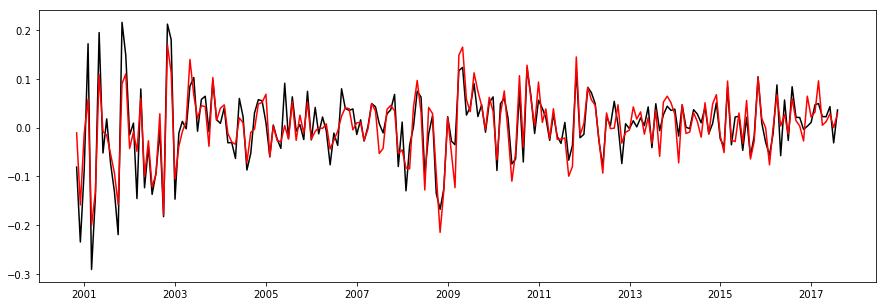

In [57]:
plt.figure(figsize = (15,5))
plt.plot(y,'k-')
plt.plot(y_predict,'r-')
plt.show()